--2025-04-20 11:22:06--  https://raw.githubusercontent.com/mohamedatia2223/NeuralNetworkProject/main/results/model.pk1
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 875502 (855K) [application/octet-stream]
Saving to: ‘model.pkl’

model.pkl           100%[===================>] 854.98K  --.-KB/s    in 0.07s   

2025-04-20 11:22:07 (11.4 MB/s) - ‘model.pkl’ saved [875502/875502]

Model loaded successfully!


Saving Screenshot 2025-04-20 132619.png to Screenshot 2025-04-20 132619.png


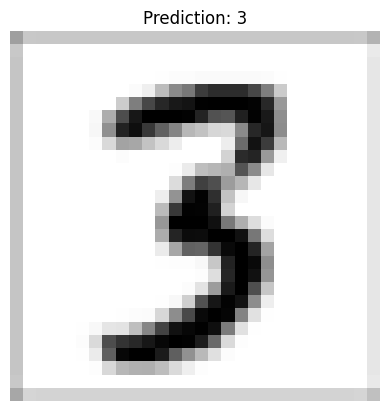

In [ ]:
#  Load dependencies
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Download model from GitHub
!wget https://raw.githubusercontent.com/mohamedatia2223/NeuralNetworkProject/main/results/model.pk1 -O model.pkl

# Activation functions
def relu(z):
    return np.maximum(0, z)

def softmax(z):
    shift_z = z - np.max(z, axis=0, keepdims=True)
    exps = np.exp(shift_z)
    return exps / np.sum(exps, axis=0, keepdims=True)

# Minimal Network class (only for loading & predicting)
class Network:
    def __init__(self, sizes, lambda_=0.0):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = []
        self.weights = []
        self.lambda_ = lambda_
        self.output_activation_func = softmax
        self.activation_func = relu

    def feedforward(self, a):
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            a = self.activation_func(np.dot(w, a) + b)
        return self.output_activation_func(np.dot(self.weights[-1], a) + self.biases[-1])

    @staticmethod
    def load(filename):
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        net = Network(data['sizes'], data['lambda_'])
        net.weights = data['weights']
        net.biases = data['biases']
        return net

# Load the trained model
net = Network.load("model.pkl")
print("Model loaded successfully!")

# Upload an image to test
uploaded = files.upload()

for fn in uploaded.keys():
    img = Image.open(fn).convert('L').resize((28, 28))
    img_arr = np.array(img).reshape(784, 1)
    img_arr = 1 - img_arr / 255.0

    prediction = np.argmax(net.feedforward(img_arr))
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    plt.show()
